Name: Hamzah Ahsan

SapId: 56187

Section: SE 5-2

Course: Artificial Intelligence (AI)

Project: Intelligent Career Guidance System

1. Added Libraries

In [47]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


2. Dataset CSV File Uploading

In [54]:
uploaded = files.upload()
df = pd.read_csv("career_guidance_dataset.csv")

Saving career_guidance_dataset.csv to career_guidance_dataset (5).csv


,Student_ID,Age,Gender,Field_of_Study,Year_of_Study,University_Location,GPA,Relevant_Coursework,Prior_Employment,Employment_Type,...,Career_Interests,Entrepreneurial_Aspirations,Career_Guidance_Satisfaction,Recommended_Career_Path,Entrepreneurship_Suitability_Score,Top_Recommended_Industries,Predicted_Job_Success_Probability,User_Satisfaction,Followed_Recommendations,Employment_Status_Post_Graduation
0,S0001,24,Female,Science,4,Region A,3.64,0,1,Full-time,...,Design,High,7,Healthcare,11,Tech,13,4,1,Unemployed
1,S0002,21,Female,Engineering,5,Region C,2.88,0,1,Internship,...,Tech,Low,1,Design,34,Healthcare,20,6,1,Self-employed
2,S0003,28,Male,Business,3,Region A,2.26,1,1,Full-time,...,Design,High,6,Tech,69,Tech,42,10,0,Employed
3,S0004,25,Female,Business,5,Region B,2.76,1,0,Internship,...,Finance,Low,6,Finance,71,Finance,27,9,0,Unemployed
4,S0005,22,Male,Law,2,Region A,3.24,1,1,Part-time,...,Finance,Low,5,Business,20,Education,20,5,1,Self-employed


3. Handle Missing Values

In [32]:
df.fillna(df.mode().iloc[0], inplace=True)
print("Missing values handled!")

Missing values handled!


4. Encode Categorical Columns

In [61]:
encoders = {}

for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

print("Categorical Encoding completed.")
df.head()

Categorical Encoding completed.


,Student_ID,Age,Gender,Field_of_Study,Year_of_Study,University_Location,GPA,Relevant_Coursework,Prior_Employment,Employment_Type,...,Career_Interests,Entrepreneurial_Aspirations,Career_Guidance_Satisfaction,Recommended_Career_Path,Entrepreneurship_Suitability_Score,Top_Recommended_Industries,Predicted_Job_Success_Probability,User_Satisfaction,Followed_Recommendations,Employment_Status_Post_Graduation
0,0,24,0,4,4,0,3.64,0,1,0,...,1,0,7,3,11,4,13,4,1,2
1,1,21,0,2,5,2,2.88,0,1,1,...,4,1,1,1,34,3,20,6,1,1
2,2,28,1,1,3,0,2.26,1,1,0,...,1,0,6,4,69,4,42,10,0,0
3,3,25,0,1,5,1,2.76,1,0,1,...,2,1,6,2,71,2,27,9,0,2
4,4,22,1,3,2,0,3.24,1,1,2,...,2,1,5,0,20,1,20,5,1,1


5. Prepare Features and Target

In [63]:
target = "Recommended_Career_Path"

X = df.drop(columns=[target])
y = df[target]

y = to_categorical(y)

print("Data Ready!")


Data Ready!


6. Split and Scale Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Scaling completed!")

Scaling completed!


7. Build CNN Model

In [74]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 19, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 7, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,965 (50.64 KB)

 Trainable params: 12,965 (50.64 KB)

 Non-trainable params: 0 (0.00 B)

8. Train CNN Model

In [68]:
history = model.fit(
X_train, y_train,
epochs=120, batch_size=32,
validation_split=0.2
)

Epoch 1/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2172 - loss: 1.6240 - val_accuracy: 0.1937 - val_loss: 1.6116
Epoch 2/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2262 - loss: 1.6025 - val_accuracy: 0.2375 - val_loss: 1.5990
Epoch 3/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2076 - loss: 1.5983 - val_accuracy: 0.2438 - val_loss: 1.5999
Epoch 4/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2705 - loss: 1.5890 - val_accuracy: 0.2125 - val_loss: 1.6016
Epoch 5/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2751 - loss: 1.5836 - val_accuracy: 0.2750 - val_loss: 1.5971
Epoch 6/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2630 - loss: 1.5759 - val_accuracy: 0.2188 - val_loss: 1.6013
Epoch 7/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3056 - loss: 1.5602 - val_accuracy: 0.2250 - val_loss: 1.6047
Epoch 8/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2955 - loss: 1.5568 - val_accuracy: 0.1937 - 

9. Plot Training History

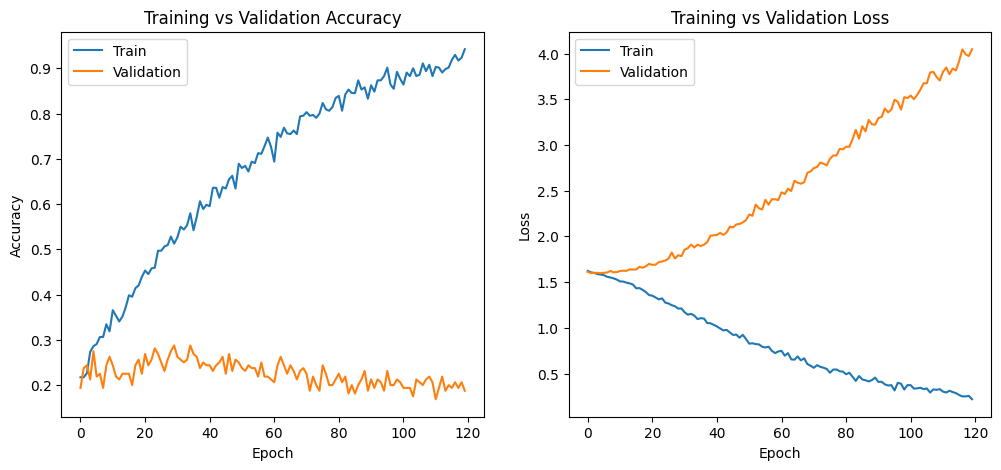

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.show()

10. Model Evaluation

In [70]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.style.set_table_styles(
[{'selector': 'th', 'props': [('background-color', '#4CAF50'),
('color', 'white'),
('font-weight', 'bold')]},
{'selector': 'td', 'props': [('padding', '6px')]}]
).set_properties(**{'text-align': 'center'})

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


,precision,recall,f1-score,support
0,0.310345,0.225000,0.260870,40.000000
1,0.121951,0.125000,0.123457,40.000000
2,0.212766,0.232558,0.222222,43.000000
3,0.243902,0.285714,0.263158,35.000000
4,0.166667,0.166667,0.166667,42.000000
accuracy,0.205000,0.205000,0.205000,0.205000
macro avg,0.211126,0.206988,0.207275,200.000000
weighted avg,0.209887,0.205000,0.205696,200.000000


11. Confusion Matrix

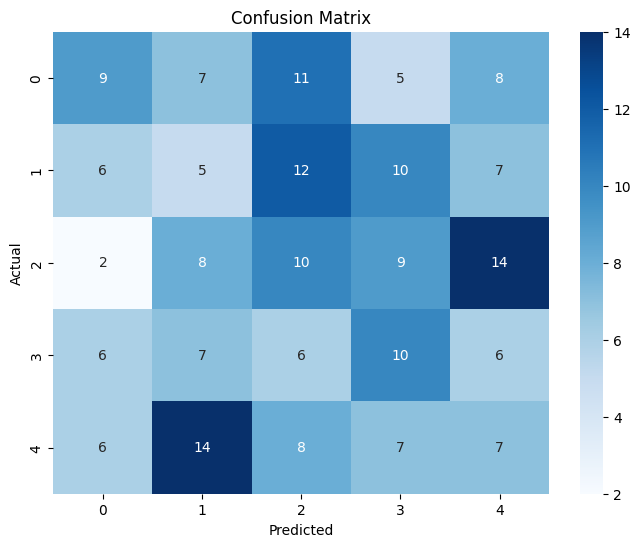

In [71]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()